<a href="https://colab.research.google.com/github/martinpius/LASSO/blob/main/app_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

In [ ]:
cols = ['CRIM', 'ZN',
        'INDUS', 'CHAS',
        'NOX', 'RM',
        'AGE', 'DIS',
        'RAD', 'TAX',
        'PTRATIO', 'B',
        'LSTAT']

In [ ]:
df = pd.DataFrame(data = X, columns = cols)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Split dataset into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
### Polynomial Regression**
# Transform the features into polynomial terms (degree=2) and fit the model
poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# Compute Metrics
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

In [ ]:

print("Polynomial Regression Metrics:")
print(f"   - Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"   - R² Score: {r2_poly:.4f}")

Polynomial Regression Metrics:
   - Mean Squared Error (MSE): 14.2573
   - R² Score: 0.8056


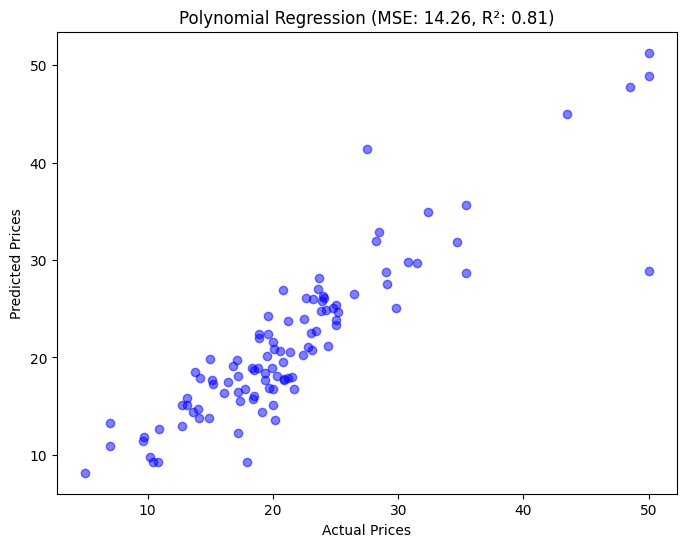

In [ ]:
# Plot Actual vs Predicted for Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color="blue", alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Polynomial Regression (MSE: {mse_poly:.2f}, R²: {r2_poly:.2f})")
plt.show()

In [ ]:
### **2️⃣ Convert Regression Data to Classification for Logistic Regression**
# Create a binary classification target (Above/Below Median Price)
median_price = np.median(y)
y_class = (y > median_price).astype(int)  # 1 if above median, 0 if below
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_class, test_size=0.2, random_state=229)

In [ ]:
# **🔹 Ensure X_train_log and X_test_log are Numeric Arrays**
X_train_log = X_train_log.to_numpy(dtype=np.float64)  # Convert DataFrame to NumPy array
X_test_log = X_test_log.to_numpy(dtype=np.float64)

# **🔹 Normalize Data (StandardScaler)**
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)
# **🔹 Fit Logistic Regression Model**
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)


LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred_log = log_model.predict(X_test_log)

In [ ]:
# Compute Classification Metrics
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)

In [ ]:
print("\n🔹 Logistic Regression Metrics:")
print(f"   - Accuracy: {accuracy:.4f}")
print(f"   - Precision: {precision:.4f}")
print(f"   - Recall: {recall:.4f}")
print(f"   - F1 Score: {f1:.4f}")


🔹 Logistic Regression Metrics:
   - Accuracy: 0.8627
   - Precision: 0.8776
   - Recall: 0.8431
   - F1 Score: 0.8600


In [ ]:
# **🔹 Compute Confusion Matrix**
cm = confusion_matrix(y_test_log, y_pred_log)
labels = ["Below Median (0)", "Above Median (1)"]

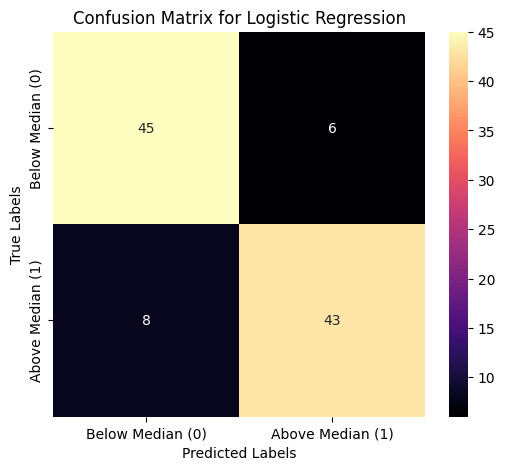

In [ ]:
# **🔹 Plot Confusion Matrix**
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
### **3️⃣ Neural Network Regression**
# Split dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state= 1291)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)


In [ ]:
# Fit Neural Network Regression
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, alpha= 3e-4, random_state=12301)
nn_model.fit(X_train_nn, y_train_nn)

MLPRegressor(alpha=0.0003, hidden_layer_sizes=(50, 50), max_iter=5000,
             random_state=12301)

In [ ]:
# Predictions & Compute Error
y_pred_nn = nn_model.predict(X_test_nn)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
r2_nn = r2_score(y_test_nn, y_pred_nn)

In [ ]:
print("\n🔹 Neural Network Regression Metrics:")
print(f"   - Mean Squared Error (MSE): {mse_nn:.4f}")
print(f"   - R² Score: {r2_nn:.4f}")


🔹 Neural Network Regression Metrics:
   - Mean Squared Error (MSE): 13.1434
   - R² Score: 0.8085


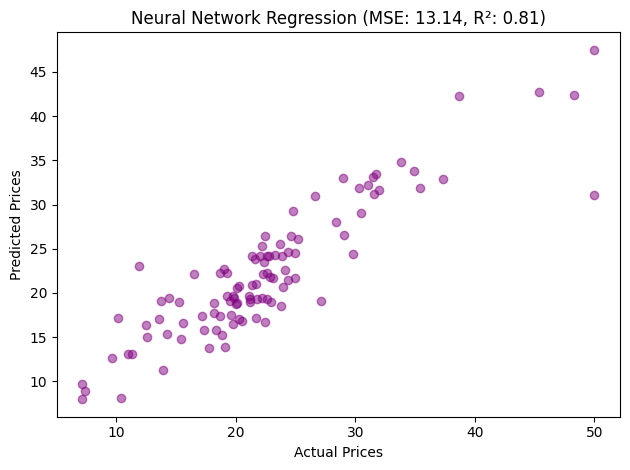

In [ ]:
# Plot Actual vs. Predicted Prices
plt.scatter(y_test_nn, y_pred_nn, color="purple", alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Neural Network Regression (MSE: {mse_nn:.2f}, R²: {r2_nn:.2f})")

plt.tight_layout()
plt.show()